# Above Ground Biomass


## Overview

In this section, we build upon the [V3 Quickstart Raster Query](./../../v3/quickstart/raster_query.ipynb) guide to make a request to the Geospatial APIs Above Ground Biomass (AGB) endpoint for both species agnostic and species specific Data Layers, analyze and explore in detail the various ways the data can be visualized while dealing with different sections of queries. Above Ground Biomass (AGB) Geospatial APIs are exclusively available in API version <I>v4</I>, distinguishing it from the v3 version. 

## Data Layers

The Above Ground Biomass (AGB) Data Set consists of two Data Layers namely species Agnostic and species Specific. Let's learn about the two Data Layers in detail below:

First in the list, The Above Ground Biomass (AGB) species agnostic Data Layer represented as `above-ground-biomass` provides historic and future (predictive) carbon units and CO2 capture data irrespective of species. This inference model outputs in megagrams of carbon per hectare or tonnes of carbon per hectare. Permanent water is set to 0 Mg C/ha.

Next, The Above Ground Biomass (AGB) species specific Data Layer represented as `tree-species-above-ground-biomass-natural` provides the historic and future (predective) carbon units and CO2 capture data based on natural growth of existing trees in an area. For example, `para_rubber`.

As mentioned above, AGB supports both historical carbon units retrieval and prediction of the same based on the available data. If a user requests data for a year where the system has the data it will be provided, for a future prediction the previous years data is used as the basis for a prediction.

For future predictions in the example below, the predictive models use the Coupled Model Intercomparison Project Phase 6 (CMIP6) – climate change patterns data and ISRIC Soil Grid data. 

This notebook operates with the same query flow as the raster v3 tutorial; submit query, check the status, download the result and load the data into memory for analysis.

## Setup

Before starting, you have to install IBM EI Geospatial python SDK i.e ibmpairs and other modules needed to run this sample, mentioned in the below cell.

<b>Note:</b> To run this notebook seamlessly, you have to first configure your Geospatial APIs' credentials in a file named `secrets.ini` in the below format:

```
[EI]
api.api_key = <Your Geospatial APIs API key>
api.tenant_id = <Your Geospatial APIs Tenant ID>
api.org_id = <Your Geospatial APIs Org ID>

```
Keep the secrets.ini file at an appropriate relative location of this notebook. For example, as specified in the below config.

```config.read('../../../auth/secrets.ini')```

In [ ]:
%pip install ibmpairs
%pip install rasterio
%pip install folium
%pip install configparser
%pip install matplotlib

In [17]:
import ibmpairs.client as client
import ibmpairs.query as query
import matplotlib.pyplot as plt
import os
import json
import rasterio
from IPython.display import display as display_summary
from IPython import display
import configparser
import folium,numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import branca.colormap as cm
import pandas as pd

### Get authentication token

Now, let's create a client object using the API_KEY, TENANT_ID (or CLIENT_ID) and ORG_ID to create an authenticated HTTP client Authentication token using 'ibmpairs.client' module, to use it in the subsequent steps.

In [18]:
config = configparser.RawConfigParser()
config.read('../../../auth/secrets.ini')

EI_ORG_ID     = config.get('EI', 'api.org_id') 
EI_TENANT_ID  = config.get('EI', 'api.tenant_id') 
EI_APIKEY     = config.get('EI', 'api.api_key')

EI_client_v4 = client.get_client(org_id    = EI_ORG_ID,
                                  tenant_id = EI_TENANT_ID,
                                  api_key     = EI_APIKEY,
                                  version   = 4
                                )

2025-01-20 09:37:47 - paw - INFO - The client authentication method is assumed to be OAuth2.
2025-01-20 09:37:47 - paw - INFO - Legacy Environment is False
2025-01-20 09:37:47 - paw - INFO - The authentication api key type is assumed to be IBM EIS, because the api key prefix 'PHX' is present.
2025-01-20 09:37:49 - paw - INFO - Authentication success.
2025-01-20 09:37:49 - paw - INFO - HOST: https://api.ibm.com/geospatial/run/na/core/v4


## Make a v4 Query

The following code snippet submits the query for the AGB Data Layers <b><i>above-ground-biomass</i></b>,  <b><i>tree-species-above-ground-biomass-natural</i></b>  for years 2020, 2021, 2022, 2023 and 2025 using Geospatial APIs V4 query API, waits for it to finish, downloads the data to the download folder, loads the data to memory and displays it on screen. This could take a few minutes to complete as all the data is brought together.

We will go ahead and define and submit a query.

In [45]:
# submit, checks the status and downloads the result of the query (this will poll until the result is ready)
above_ground_biomass_query_object = query.submit_check_status_and_download({ 
                          "name": "Above Ground Biomass - species agnostic and species specific",
                          "spatial": {
                            "geojson": {
                                  "type": "Feature",
                                  "geometry": {
                                  "type":"MultiPolygon",
                                  "coordinates": [
                                        [[[-60.214317, -2.9969556],
                                        [-60.167936, -2.9462908],
                                        [-60.120401, -2.9393059],
                                        [-60.086933, -2.9799697],
                                        [-60.214317,-2.9969556]]]
                                    ] 
                                  }   
                            } },
                          "temporal": { "years": [2020, 2021, 2022, 2023, 2025] },
                          "layers": [ 
                              { "datalayer": "above-ground-biomass" },
                              {
                                "datalayer": "tree-species-above-ground-biomass-natural",
                                "properties": {
                                    "species": "para_rubber"
                                    }
                              }
                            ]
                        },EI_client_v4)

2025-01-20 12:48:21 - paw - INFO - TASK: submit_check_status_and_download STARTING.
2025-01-20 12:48:23 - paw - INFO - The query was successfully submitted with the id: 1737331200_26303306.
2025-01-20 12:48:24 - paw - INFO - The query 1737331200_26303306 has the status Queued.
2025-01-20 12:48:55 - paw - INFO - The query 1737331200_26303306 has the status Running.
2025-01-20 12:49:27 - paw - INFO - The query 1737331200_26303306 has the status Running.
2025-01-20 12:49:58 - paw - INFO - The query 1737331200_26303306 has the status Running.
2025-01-20 12:50:30 - paw - INFO - The query 1737331200_26303306 has the status Running.
2025-01-20 12:51:01 - paw - INFO - The query 1737331200_26303306 has the status Running.
2025-01-20 12:51:33 - paw - INFO - The query 1737331200_26303306 has the status Running.
2025-01-20 12:52:04 - paw - INFO - The query 1737331200_26303306 has the status Running.
2025-01-20 12:52:36 - paw - INFO - The query 1737331200_26303306 has the status Running.
2025-01-20

## Summary of the data

Let's look at the summary from the result of the query:

In [46]:
# Removing the max col width on the table to display the entire data.
pd.set_option('display.max_colwidth', None)

species_agnostic_file_list = above_ground_biomass_query_object.list_files()
#This gets the folder location of where the query result is downloaded.
download_location = above_ground_biomass_query_object.get_download_folder() + above_ground_biomass_query_object.id
summary_file_species_agnostic = download_location + '/' +'Above Ground Biomass-above ground biomass summary agb.json'
summary_file_species_specific = download_location + '/' +'Above Ground Biomass-species specific summary agb.json'

summary = pd.concat([pd.read_json(summary_file_species_agnostic), pd.read_json(summary_file_species_specific)], ignore_index=True)
display_summary(summary)

,year,layer_name,area_in_ha,baseline_agb_min_units,baseline_agb_max_units,baseline_agb_mean_units,baseline_total_agb_units,baseline_total_carbon_tons,baseline_total_co2_tons,agb_analytics_type,predicted_total_agb_units,predicted_total_carbon_tons,predicted_total_co2_tons
0,2020,above-ground-biomass,4814.523721,0.900000,23.580000,11.987914,6.598987e+05,329949.360000,1.210914e+06,historical,NaN,NaN,NaN
1,2021,above-ground-biomass,4814.523721,0.900000,23.310000,12.662131,6.969870e+05,348493.500000,1.278971e+06,historical,NaN,NaN,NaN
2,2022,above-ground-biomass,4814.523721,0.900000,25.020000,11.933846,6.569224e+05,328461.210000,1.205453e+06,historical,NaN,NaN,NaN
3,2023,above-ground-biomass,4814.523721,0.900000,22.680000,11.864667,6.531143e+05,326557.170000,1.198465e+06,historical,NaN,NaN,NaN
4,2025,above-ground-biomass,4814.523721,NaN,NaN,NaN,NaN,NaN,NaN,prediction,6.721760e+05,336088.007184,1.233443e+06
5,2020,tree-species-above-ground-biomass-natural,4814.523721,0.331162,49.418954,21.136943,1.163525e+06,581762.649205,2.135069e+06,historical,NaN,NaN,NaN
6,2021,tree-species-above-ground-biomass-natural,4814.523721,0.028237,62.080322,24.291539,1.337128e+06,668563.877226,2.453629e+06,historical,NaN,NaN,NaN
7,2022,tree-species-above-ground-biomass-natural,4814.523721,0.331162,57.682109,20.029312,1.102554e+06,551276.764465,2.023186e+06,historical,NaN,NaN,NaN
8,2023,tree-species-above-ground-biomass-natural,4814.523721,0.028237,49.418954,18.431539,1.100750e+06,550374.982994,2.019876e+06,historical,NaN,NaN,NaN
9,2025,tree-species-above-ground-biomass-natural,4814.523721,NaN,NaN,NaN,NaN,NaN,NaN,prediction,1.244005e+06,622002.674094,2.282750e+06


As we observe in the table above, AGB data for the specified Data Layers and spatial and temporal definitions are returned. Historical years are presented with baseline agb_data and for the prediction year i.e., 2025 in this case - the baseline data is unavailable. The reason for this is that by the time the notebook is published, 2025's data isn't available in the system and is considered as prediction year and this'll have predicted AGB units.

### Utility funtions to display the tiff files

Now, we proceed to defining some utility functions to plot the downloaded raster tiff and the summary files.

In [28]:
def get_extent(f):
    with open(f, 'r') as ff:
        stats = json.load(ff)
    boundingBox=stats["boundingBox"]
    myextent = [boundingBox["minLongitude"],boundingBox["maxLongitude"],boundingBox["minLatitude"],boundingBox["maxLatitude" ] ]
    return myextent


def display_raster(raster_file_name, colorMap, title = None, Max=None, Min=None, myextent=None):
    if raster_file_name.endswith('.tiff'):
        with rasterio.open(raster_file_name) as raster_file:
            if not myextent:
                myextent=get_extent(raster_file_name+".json")
            data = raster_file.read(1)
            mask = (data == -9999)
            masked_data = np.ma.masked_array(data, mask)
            plt.figure(figsize = (20, 12))
            if Max is None:
                Max=masked_data.max()
            if Min is None:
                Min = masked_data.min()
            plt.imshow(masked_data, cmap = colorMap, vmin = Min, vmax = Max,extent = myextent)
            if not title:
                title=os.path.basename(raster_file_name)
            plt.title(title)
            plt.colorbar()
            plt.show()

## Display the tiff files

In this step, we will display the resulting raster tiff file(s) and the summary file(s) using the above methods.

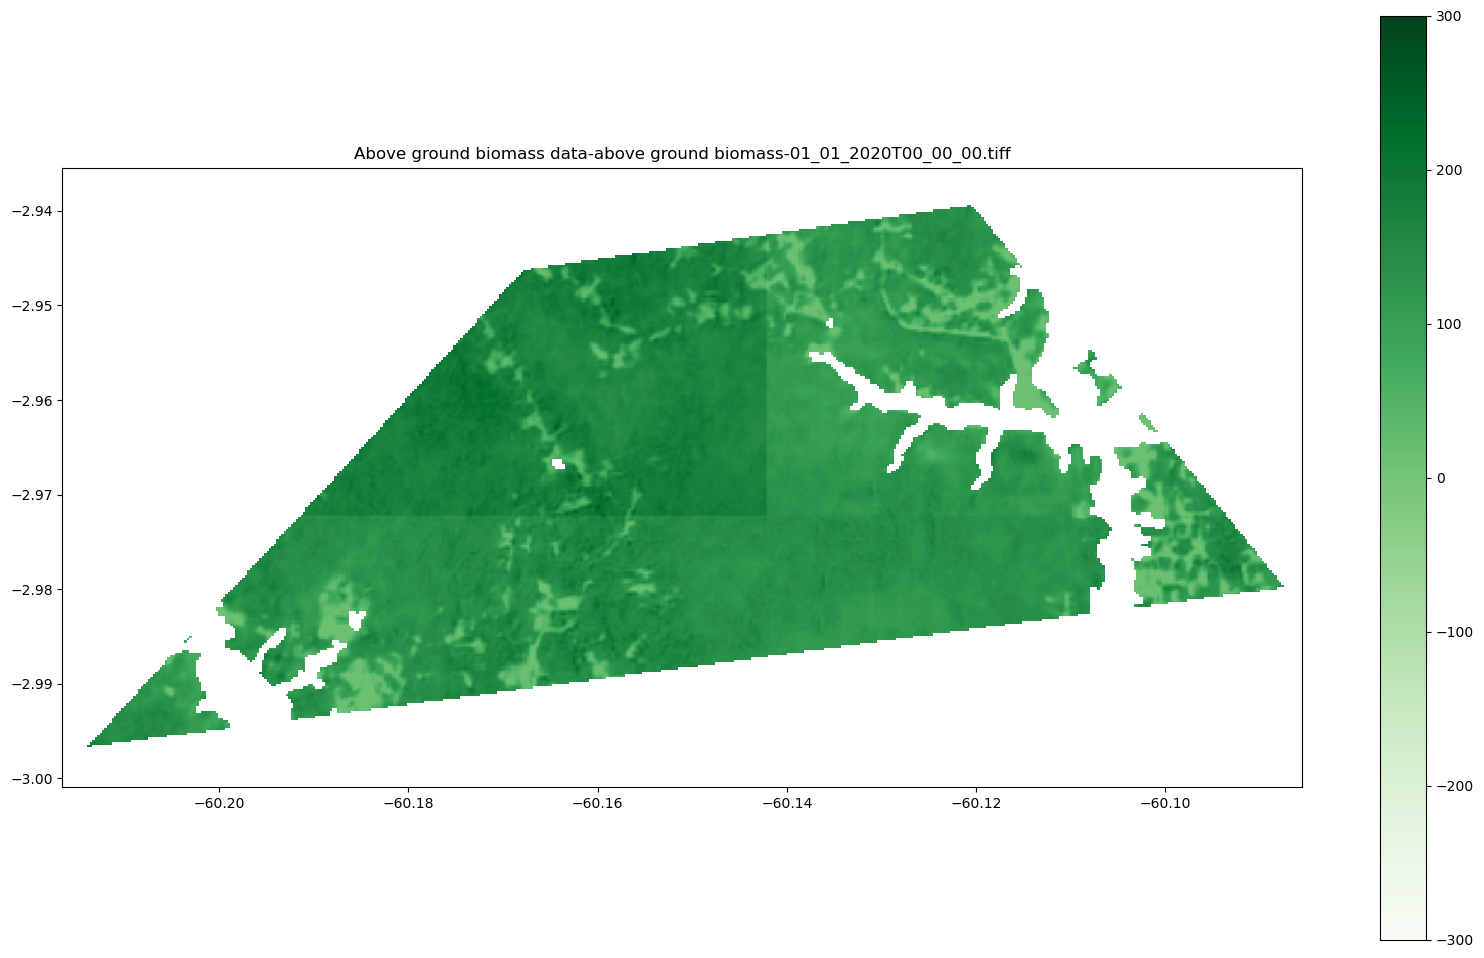

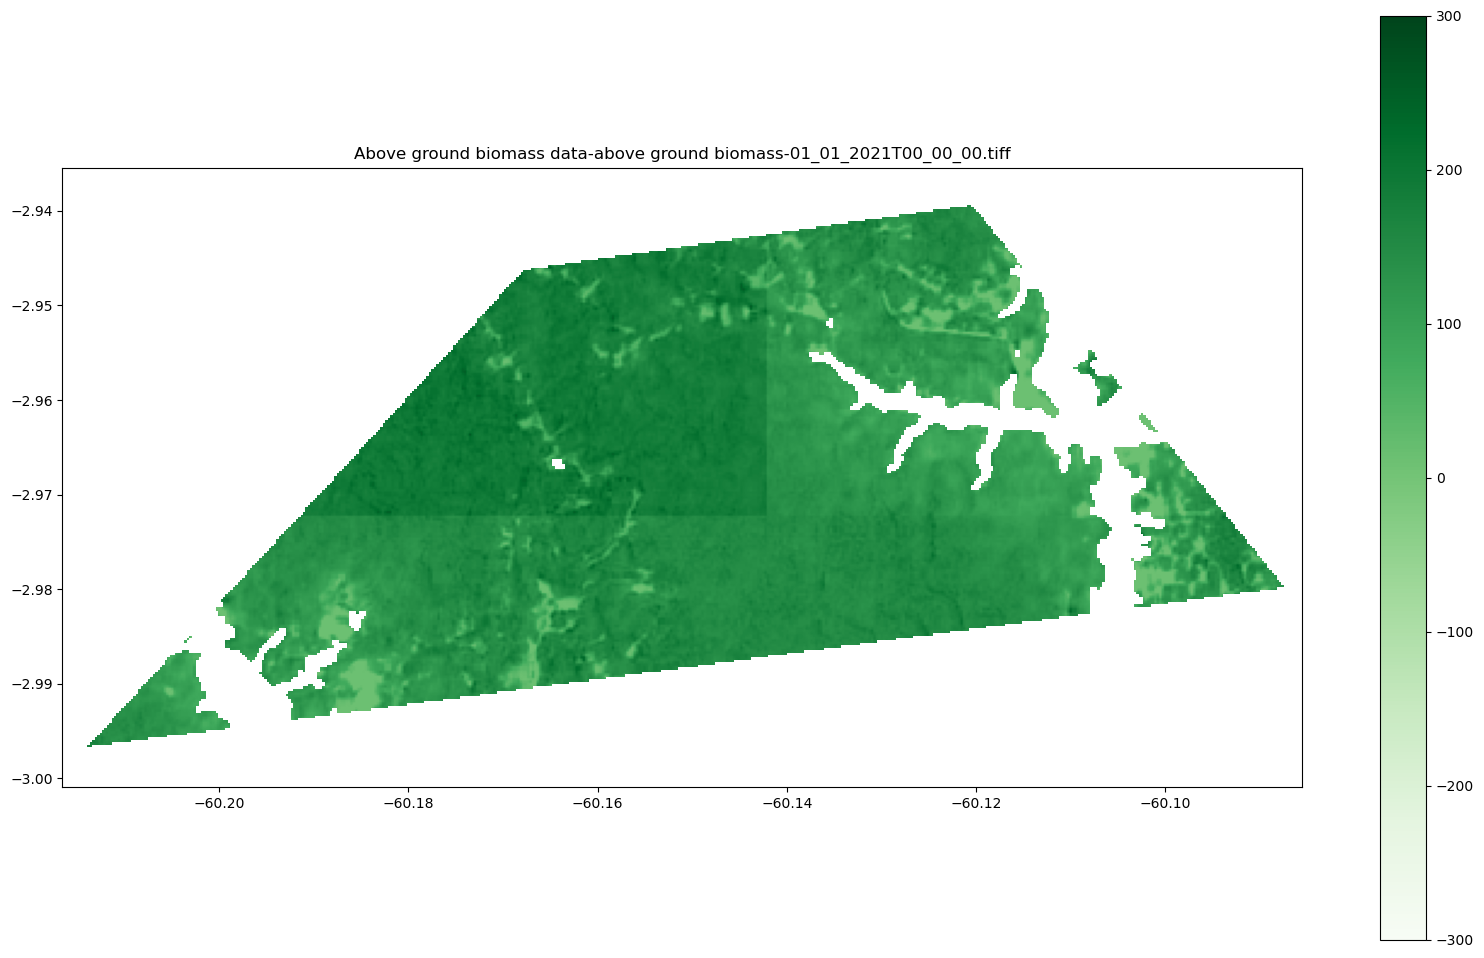

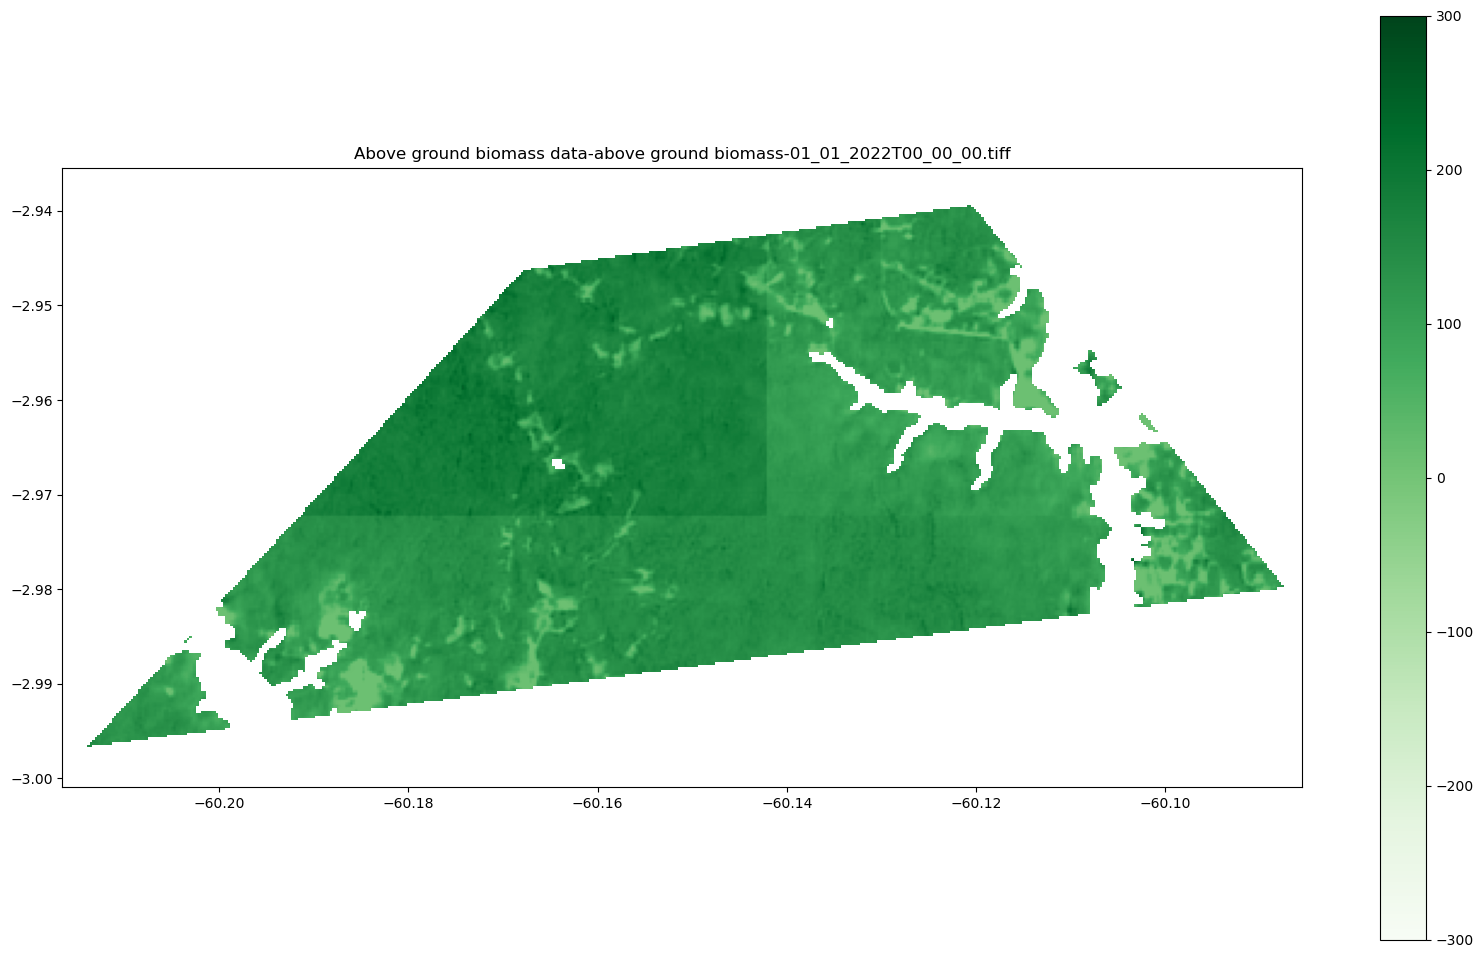

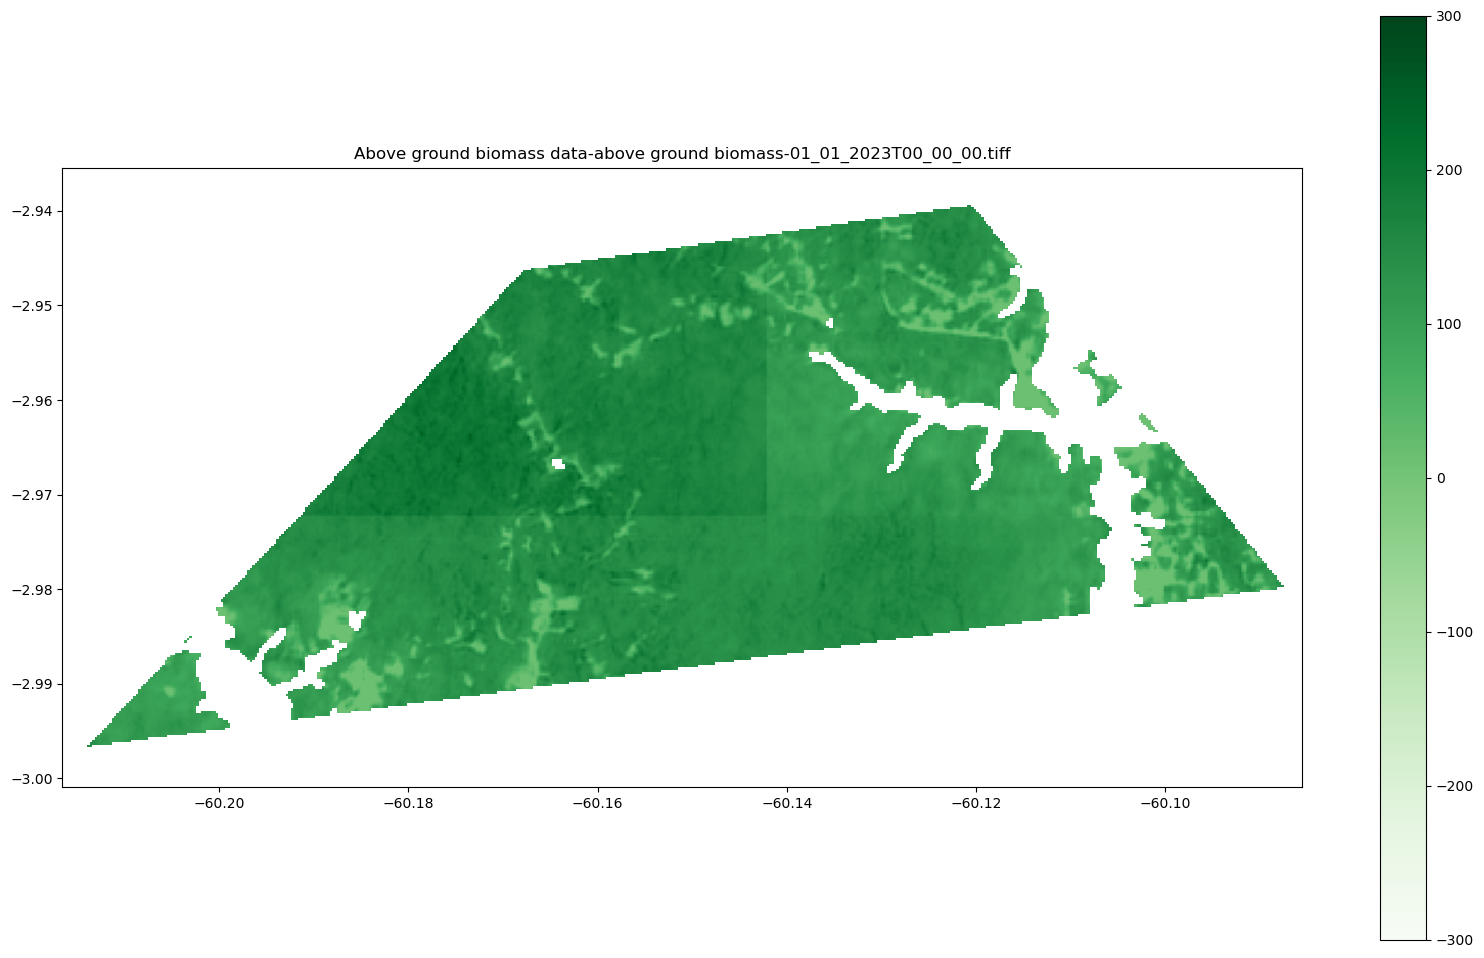

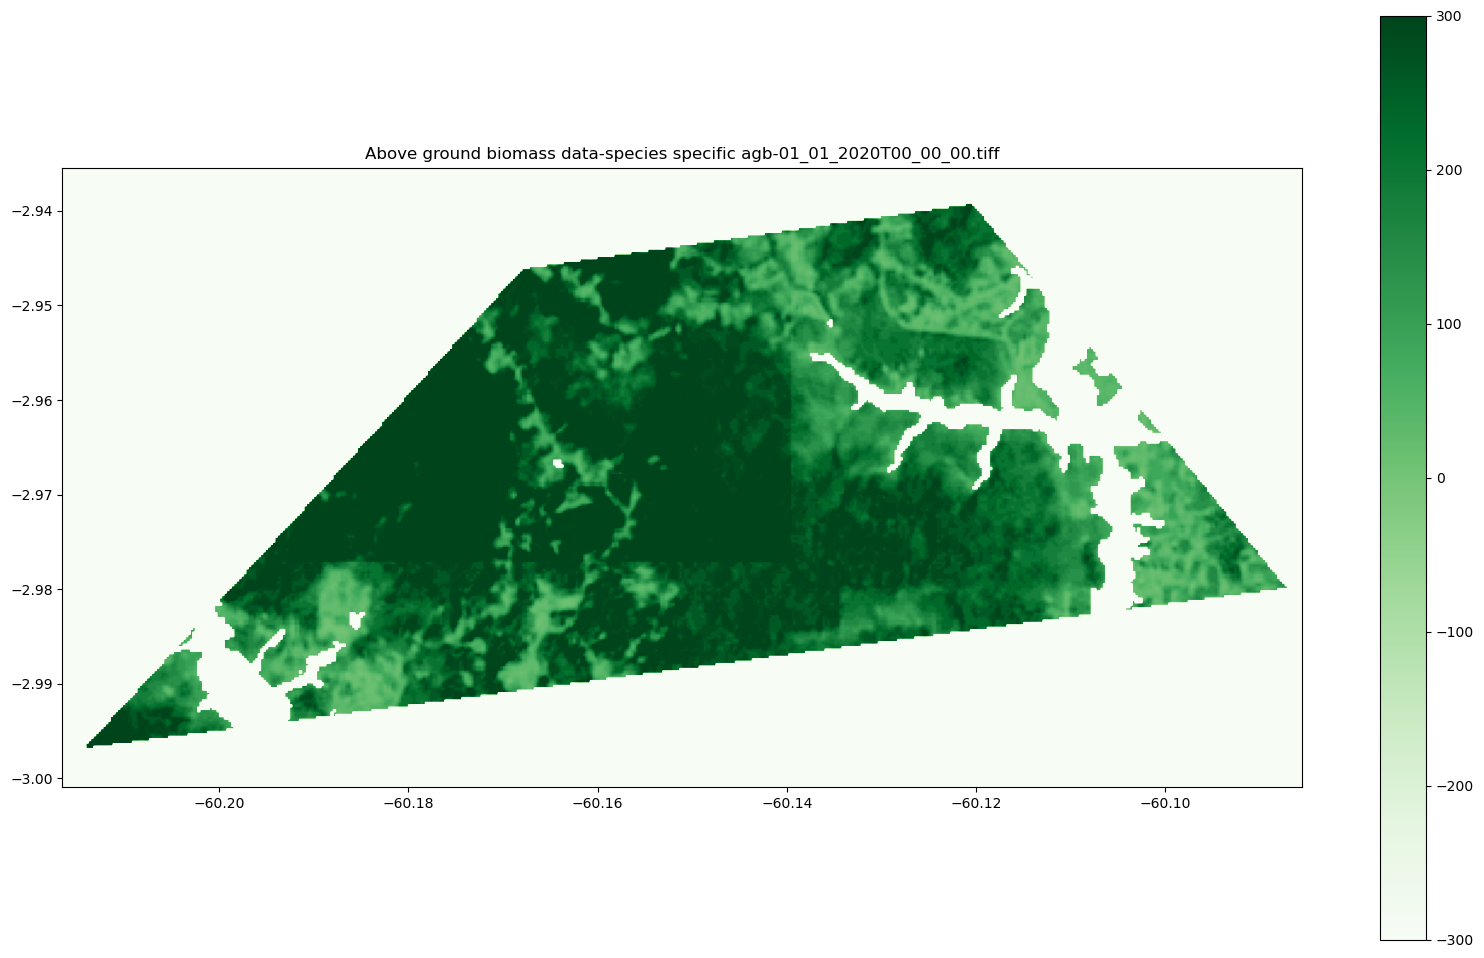

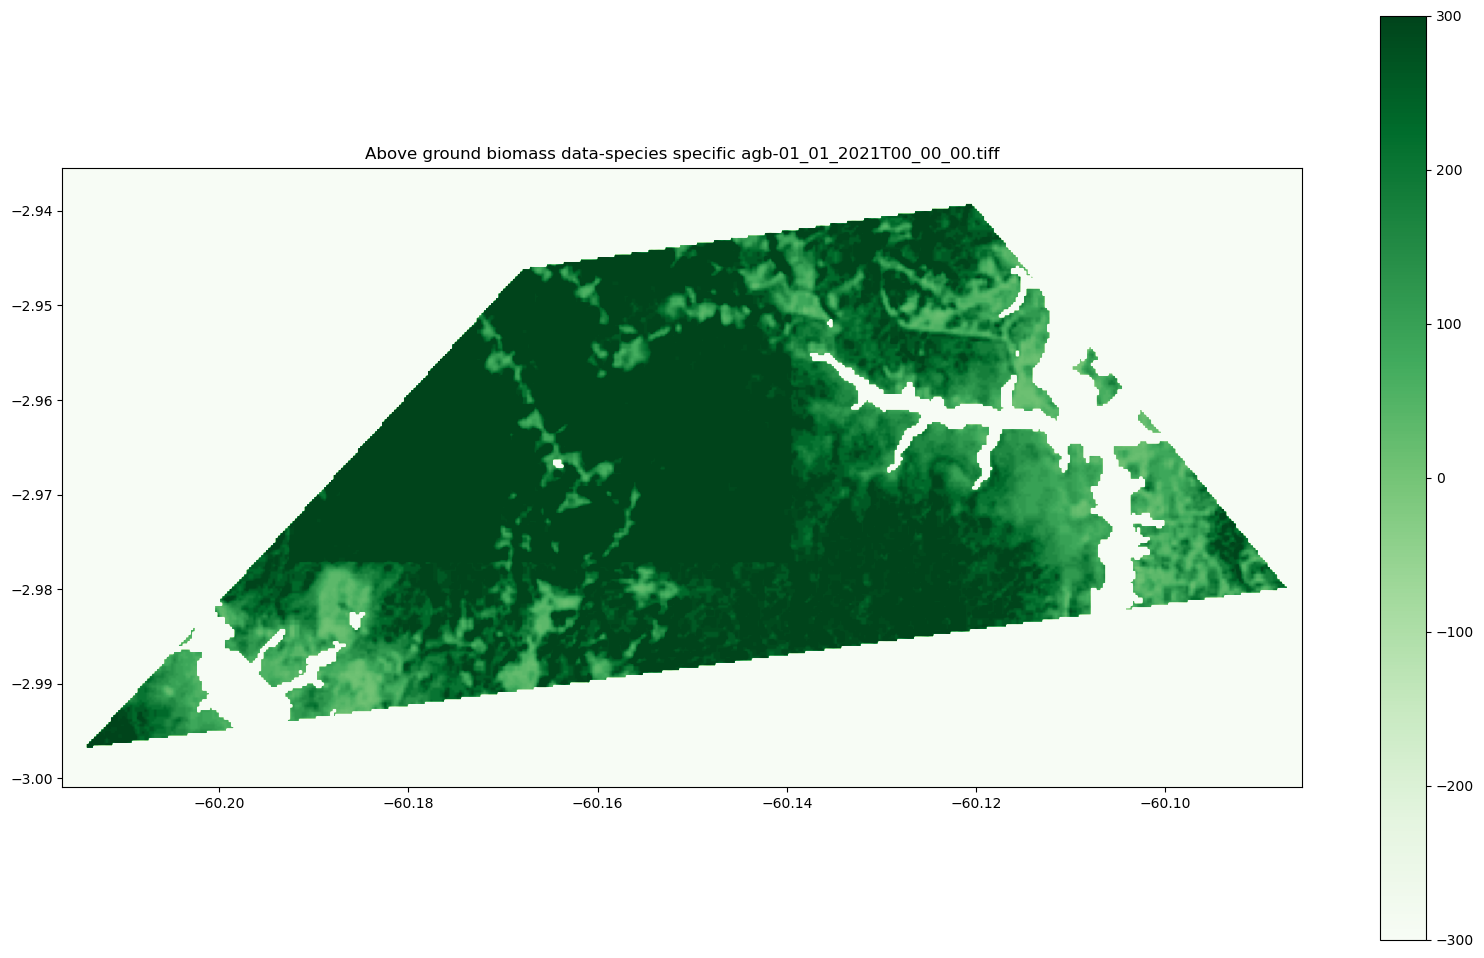

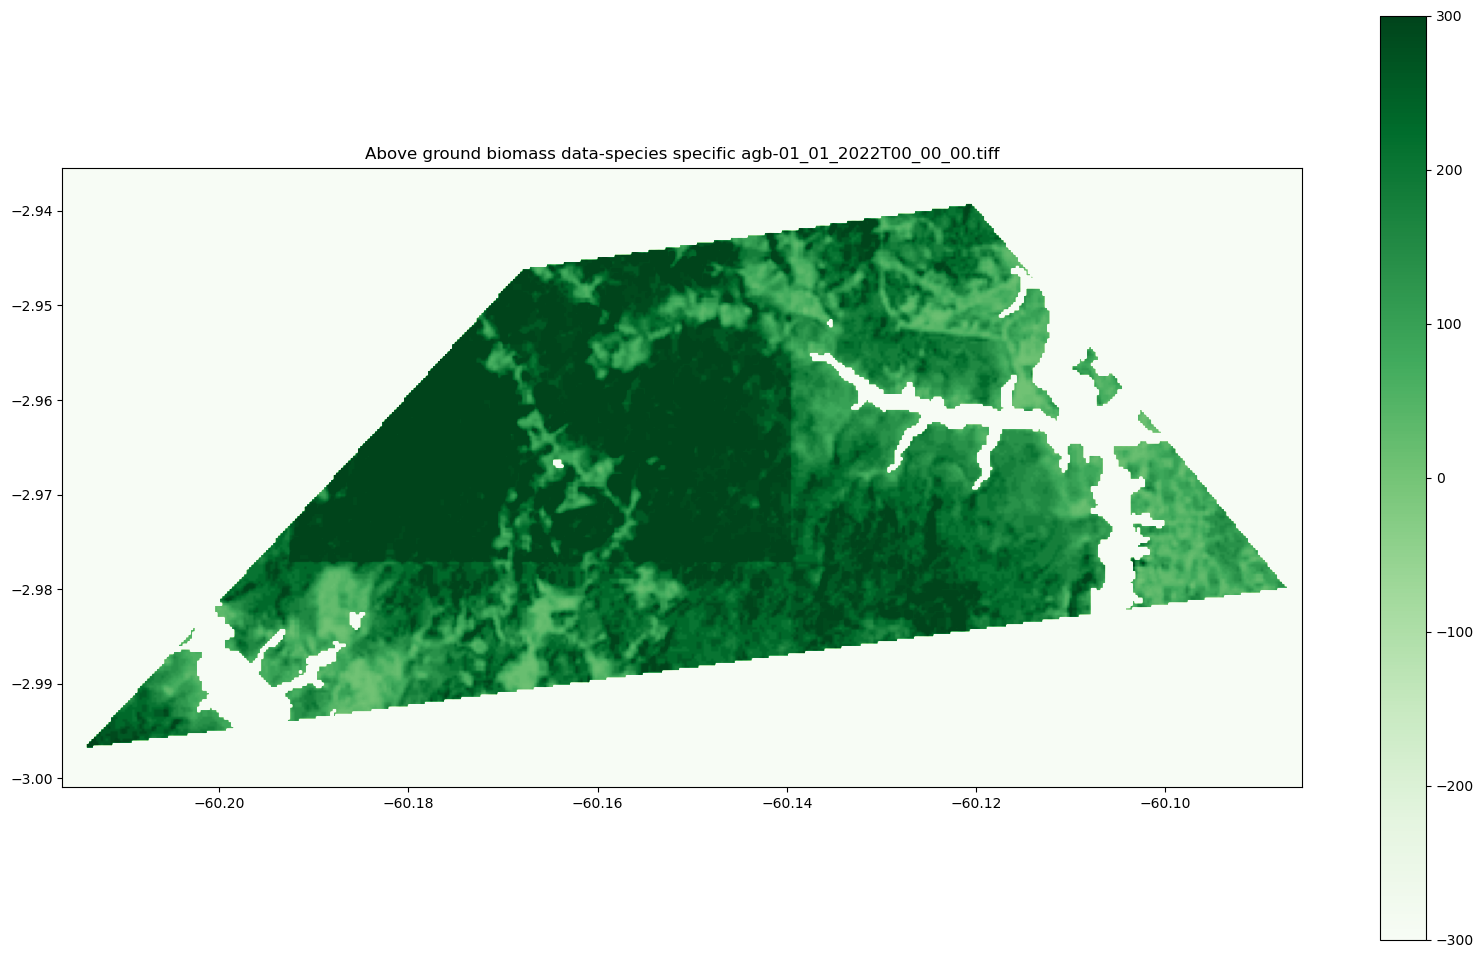

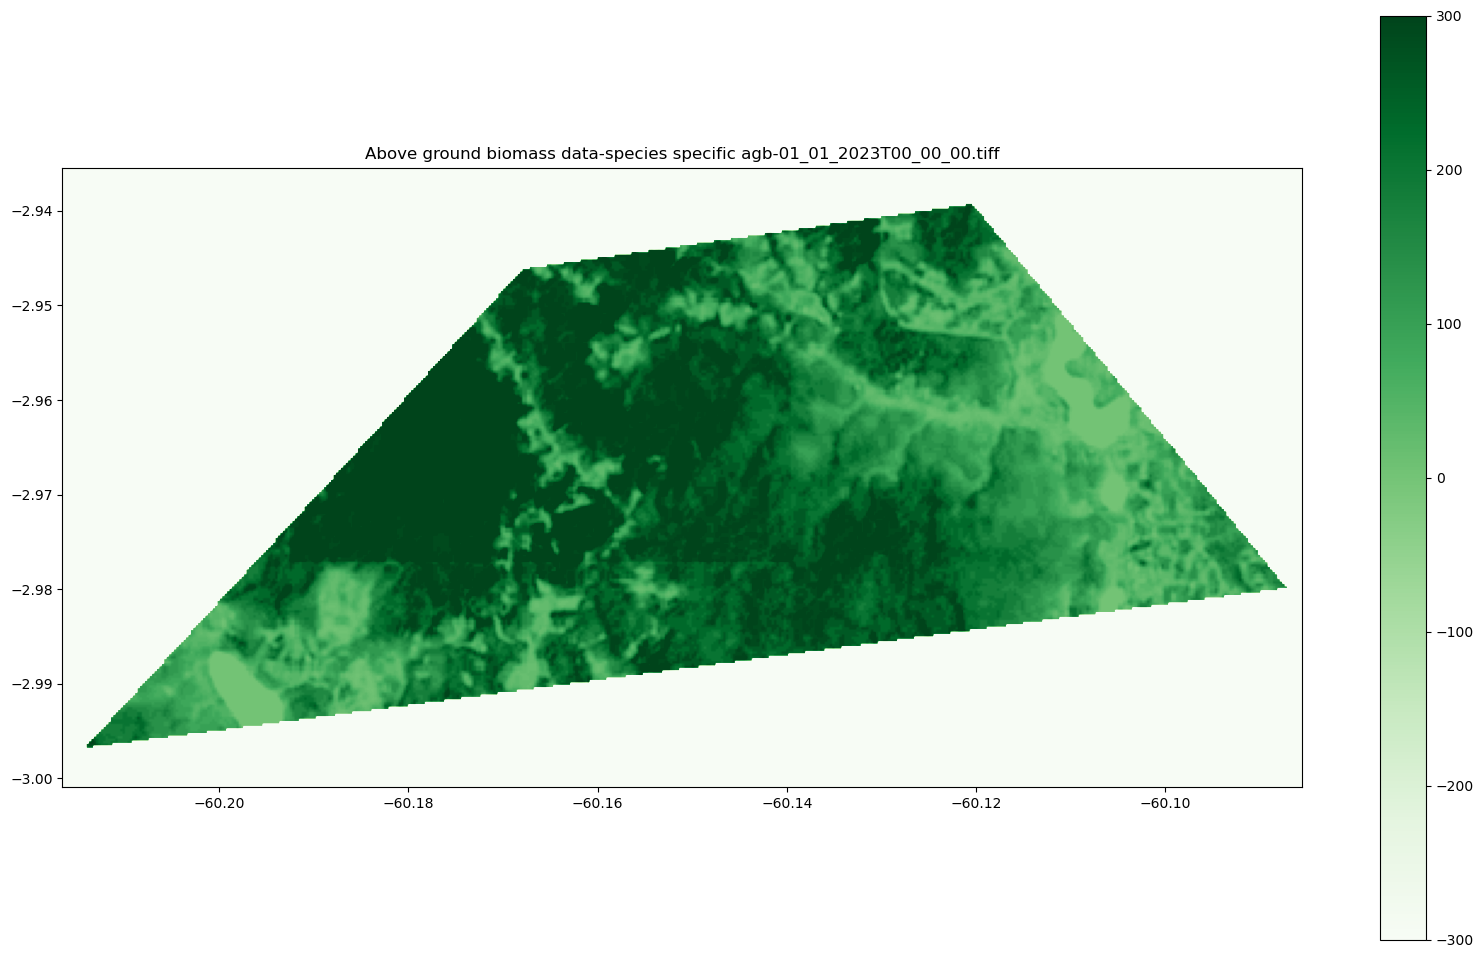

In [29]:
#sorting all the files in order from 2020 to 2023
species_agnostic_file_list.sort()
for f in species_agnostic_file_list:
    if f.endswith('.tiff'):
        display_raster(f, 'Greens', Min=-300, Max=300)  #-100 is water

## Understanding the example

Next, we will go over the details of the above example, highlighting differences to the conventional V3 raster queries we discussed previously. The changes to the `query_json` are minimal. To turn our earlier Raster query into a V4 query, we simply modified the values of:
- `spatial` key to `geojson` instead of a `square` (note that ``GeoJSON`` is an open standard format for representing geographic data and their non-spatial attributes). The coordinates describe a either a ploygon or a multipolygon depending on the area you're querying. GeoJSON Usually follow the right-hand rule which means that - exterior rings in the definition will be read counterclockwise and interior rings, clockwise.
- `temporal` key to contain a list of years instead of timestamps in the previous case. This means that, you can query an entire year by passing in the year itself instead of a temporal timestamp in the range you want to query while you still have the ability to pass in the temporal timestamp as in the previous case, passing in the years makes it very handy.
- `layers` key to be identified with the name instead of conventional data layer identification (id).

As with v3 queries, submitting the query does not immediately return data because the raster area query takes time and its operation is asynchronous. We use ``query.submit_check_status_and_download(query_json)`` in this case as well. To reiterarte again, this does what its name suggests and submits the query to Geospatial APIs, checks the status of the query as it runs and, once complete, downloads the results of the query as a zip file.

You can see from the output of the call that ``query.submit_check_status_and_download(query_json)`` prints the status of the job as it progresses:

```
2021-12-03 17:29:49 - paw - INFO - The query was successfully submitted with the id: <query-id>.
2021-12-03 17:29:49 - paw - INFO - The query <query-id> has the status Queued.
2021-12-03 17:30:19 - paw - INFO - The query <query-id> has the status Initializing.
2021-12-03 17:30:50 - paw - INFO - The query <query-id> has the status Running.
2021-12-03 17:31:20 - paw - INFO - The query <query-id> has the status Running.
2021-12-03 17:31:51 - paw - INFO - The query <query-id> has the status Writing.
2021-12-03 17:32:21 - paw - INFO - The query <query-id> has the status Succeeded.
```

The remaining functionality of the V4 queries is exactly the same as a conventional V3 query and it also gives different statuses to the job that's being processed namely ``Queued``, ``Initializing``, ``Running`` and ``Succeeded``.

Once processing is complete you can see that the resulting query zip file is placed in the download folder. This folder is usually placed inside the directory where you run this notebook from. For example, 

```
C:\<path>\<to>\<file>\downloads/<query-id>.zip.
```

Every data file that you read here once the download is done in the case V4 Raster query will exactly be in the same format as of V3 query and that's what makes it very much easier to understand a V4 query when you have a basic understanding of what a V3 raster query does.

Please refer to the [Metadata](../../v3/query/metadata.ipynb) section to understand more about how the downloaded files look like. 

In this example we only use the .tiff file. We load the pixels into a numpy array using numpy and then display the numpy array using matplotlib. All standard Python techniques. Once images have been downloaded you can use any your favourite techniques to process them. 